<a href="https://colab.research.google.com/github/ParkEunbin/gnbai20201/blob/master/lab4/gnbai_lab4_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.Import

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

2.Load data

In [0]:
columns=['x1','x2','x3','x4','y']
data=pd.read_csv("/content/iris.csv",names=columns)

In [329]:
data.shape

(150, 5)

In [0]:
#쪼개기



In [0]:
#넘파이 행렬로 바꺼줌
data_np=np.asarray(data)

#shuffle data
np.random.shuffle(data_np)

data_size=data.shape[0]
train_size = int(data_size * 0.7)
test_size = data_size - train_size

#define x
x=data_np[:, :4]

#define y
labels=data_np[:, 4]
y=np.zeros((labels.shape[0],3))
for a in range (labels.shape[0]):
  if labels[a]=='Iris-virginica':
    y[a,0]=1
  elif labels[a]=='Iris-versicolor':
    y[a,1]=1
  else:
    y[a,2]=1

#쪼개기
x_train=x[:train_size]
y_train=y[:train_size,:3]

x_test=x[-test_size:]
y_test=y[-test_size:,:3]

#y=np.identity(3)[labels]

In [332]:
y_train.shape

(105, 3)

<Train에 관한>

In [0]:
#define I,N,J,K

I,N = x_train.shape #unpacking #입력층 노드4개
J = y_train.shape[1] #출력층 3개
K = 10 #자유롭게 지정가능  #히든층 5개


In [334]:
J

3

In [0]:
#x-bar
x_bar = np.hstack((np.ones((I,1)),x_train)) 

#파라미터 초기화
v=np.random.rand(N+1,K)
w=np.random.rand(K+1,J)


In [0]:
alpha1=0.01
alpha2=0.01

max_epoch=1500

In [0]:
def sigmoid(z):
  return 1./(np.ones_like(z)+np.exp(-z))

In [0]:
def SSE(g,y):
  result=0;
  for i in range(g.shape[0]):
    for j in range(g.shape[1]):
      result+= (g[i,j]-y_train[i,j])**2

  return result/2 


In [0]:
error_train=np.zeros(max_epoch)
error_test=np.zeros(max_epoch)

In [340]:
for epoch in range(max_epoch): 
#순전파
  x_bar_bar = np.array(np.dot(x_bar, v),dtype=np.float32)
 # z=np.array(np.dot(X, T),dtype=np.float32)
  F= sigmoid(x_bar_bar)
  F_bar= np.hstack((np.ones((I,1)), F))
  F_bar_bar= np.dot(F_bar, w)
  G = sigmoid(F_bar_bar)

#역전파

#출력층 단계
  for k in range(0,K+1):
    for j in range(0,J):
      for i in range(0,I):
        w[k,j]-= alpha1*(G[i,j]-y_train[i,j])*G[i,j]*(1-G[i,j])*F_bar[i,k]

#은닉 층 단계
  for n in range(0,N+1):
    for k in range(0,K):
      for i in range(0,I):
        for j in range(0,J):
          v[n,k]-= alpha2*(G[i,j]-y_train[i,j])*G[i,j]*(1-G[i,j])*w[k,j]*F[i,k]*(1-F[i,k])*x_bar[i,n]

  error =SSE(G,y)

  error_train[epoch]=error
  if epoch%100 ==0:
    print("epoch:%d, error:%.2f" %(epoch,error))

epoch:0, error:103.81
epoch:100, error:51.54
epoch:200, error:49.03
epoch:300, error:46.96
epoch:400, error:17.63
epoch:500, error:16.06
epoch:600, error:15.24
epoch:700, error:15.65
epoch:800, error:15.73
epoch:900, error:15.57
epoch:1000, error:15.46
epoch:1100, error:15.40
epoch:1200, error:15.35
epoch:1300, error:15.32
epoch:1400, error:15.30


In [0]:
def h(x,v,w):
  _x_bar = np.hstack((np.ones((x.shape[0],1)),x)) 
  _x_bar_bar = np.array(np.dot(_x_bar, v), dtype=np.float32)
 
  _F= sigmoid(_x_bar_bar)
  
  _F_bar= np.hstack((np.ones((x.shape[0],1)), _F))
  _F_bar_bar= np.array(np.dot(_F_bar, w), dtype=np.float32)
  _G = sigmoid(_F_bar_bar)

  return _G

In [0]:
g=h(x_train,v,w)
#셋중 큰게 정답

In [0]:
labels_train=np.argmax(g, axis=1)

In [344]:
labels_train

array([2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1,
       2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2,
       2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1])

<TEST에 관한>

In [0]:
I,N = x_test.shape #unpacking #입력층 노드4개
J = y_test.shape[1] #출력층 3개
K = 10 #자유롭게 지정가능  #히든층 5개

In [0]:
#x-bar
x_bar = np.hstack((np.ones((I,1)),x_test)) 

#파라미터 초기화
v=np.random.rand(N+1,K)
w=np.random.rand(K+1,J)


In [347]:
for epoch in range(max_epoch): 
#순전파
  x_bar_bar = np.array(np.dot(x_bar, v),dtype=np.float32)
 # z=np.array(np.dot(X, T),dtype=np.float32)
  F= sigmoid(x_bar_bar)
  F_bar= np.hstack((np.ones((I,1)), F))
  F_bar_bar= np.dot(F_bar, w)
  G = sigmoid(F_bar_bar)

#역전파

#출력층 단계
  for k in range(0,K+1):
    for j in range(0,J):
      for i in range(0,I):
        w[k,j]-= alpha1*(G[i,j]-y_test[i,j])*G[i,j]*(1-G[i,j])*F_bar[i,k]

#은닉 층 단계
  for n in range(0,N+1):
    for k in range(0,K):
      for i in range(0,I):
        for j in range(0,J):
          v[n,k]-= alpha2*(G[i,j]-y_test[i,j])*G[i,j]*(1-G[i,j])*w[k,j]*F[i,k]*(1-F[i,k])*x_bar[i,n]

  error =SSE(G,y)

  error_test[epoch]=error*7/3
  if epoch%100 ==0:
    print("epoch:%d, error:%.2f" %(epoch,error))

epoch:0, error:43.89
epoch:100, error:29.61
epoch:200, error:29.70
epoch:300, error:29.63
epoch:400, error:18.12
epoch:500, error:17.94
epoch:600, error:17.94
epoch:700, error:17.95
epoch:800, error:17.96
epoch:900, error:17.98
epoch:1000, error:17.99
epoch:1100, error:18.00
epoch:1200, error:17.99
epoch:1300, error:17.97
epoch:1400, error:17.94


In [0]:
g=h(x_test,v,w)
#셋중 큰게 정답

In [0]:
labels_test=np.argmax(g, axis=1)

In [350]:
labels_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

6.plot

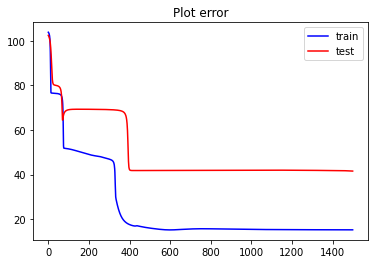

In [351]:
epoch_length=np.arange(0,max_epoch,1)
plt.plot(epoch_length,error_train,'b',label='train')
plt.plot(epoch_length,error_test,'r',label='test')
plt.title('Plot error')
plt.legend()
plt.show()